In [24]:
import numpy as np

attribute_names = ["Age", "Income", "Student", "Credit_Rating", "Buys_Computer"]

data = np.array([
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31-40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31-40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31-40", "medium", "no", "excellent", "yes"],
    ["31-40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
])

def entropy(data, column):
    unique_values, counts = np.unique(data[:, column], return_counts=True)
    probabilities = counts / len(data)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

entropies = {}
for column in range(data.shape[1] - 1):
    entropies[attribute_names[column]] = entropy(data, column)

first_feature = max(entropies.items(), key=lambda item: item[1])[0]

print("Entropy of each attribute / feature:")
for attribute, entropy_val in entropies.items():
    print(f"{attribute}: {entropy_val:.3f}")

print("First feature to be selected for constructing the decision tree:")
print(f"{first_feature}: {entropies[first_feature]:.3f}")

Entropy of each attribute / feature:
Age: 1.577
Income: 1.557
Student: 1.000
Credit_Rating: 0.985
First feature to be selected for constructing the decision tree:
Age: 1.577


In [5]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

tree_depth = pipeline.named_steps["classifier"].get_depth()

print(f"Tree depth: {tree_depth}")

Tree depth: 4


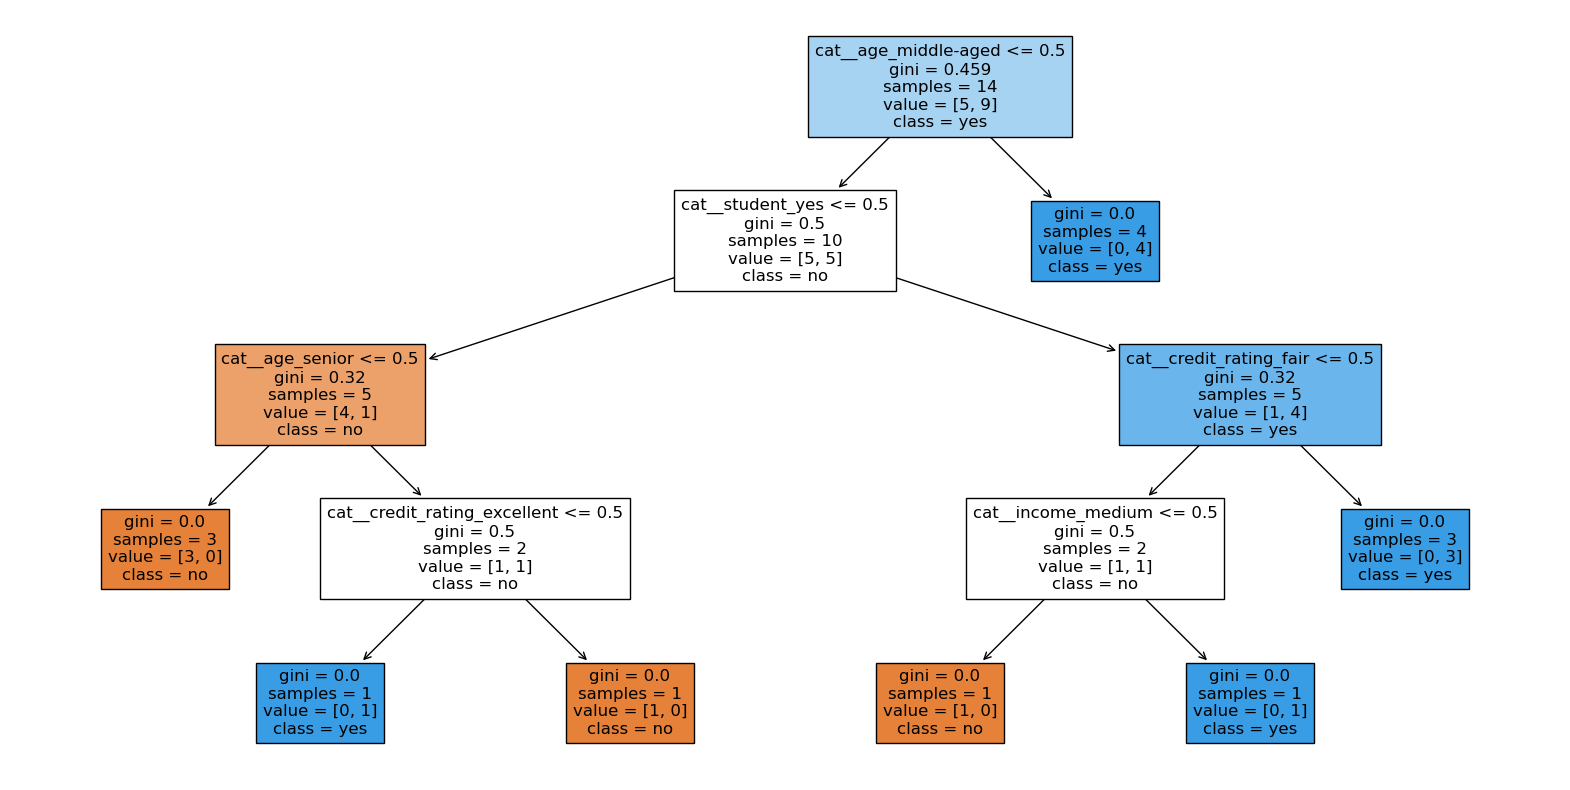

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

feature_names = list(pipeline.named_steps["preprocessor"].get_feature_names_out(input_features=categorical_features)) + list(X.columns.drop(categorical_features))

plt.figure(figsize=(20, 10))
plot_tree(pipeline.named_steps["classifier"], filled=True, feature_names=feature_names, class_names=['no', 'yes'])
plt.show()

Training Set Accuracy: 0.9778172138420586
Test Set Accuracy: 0.9571428571428572


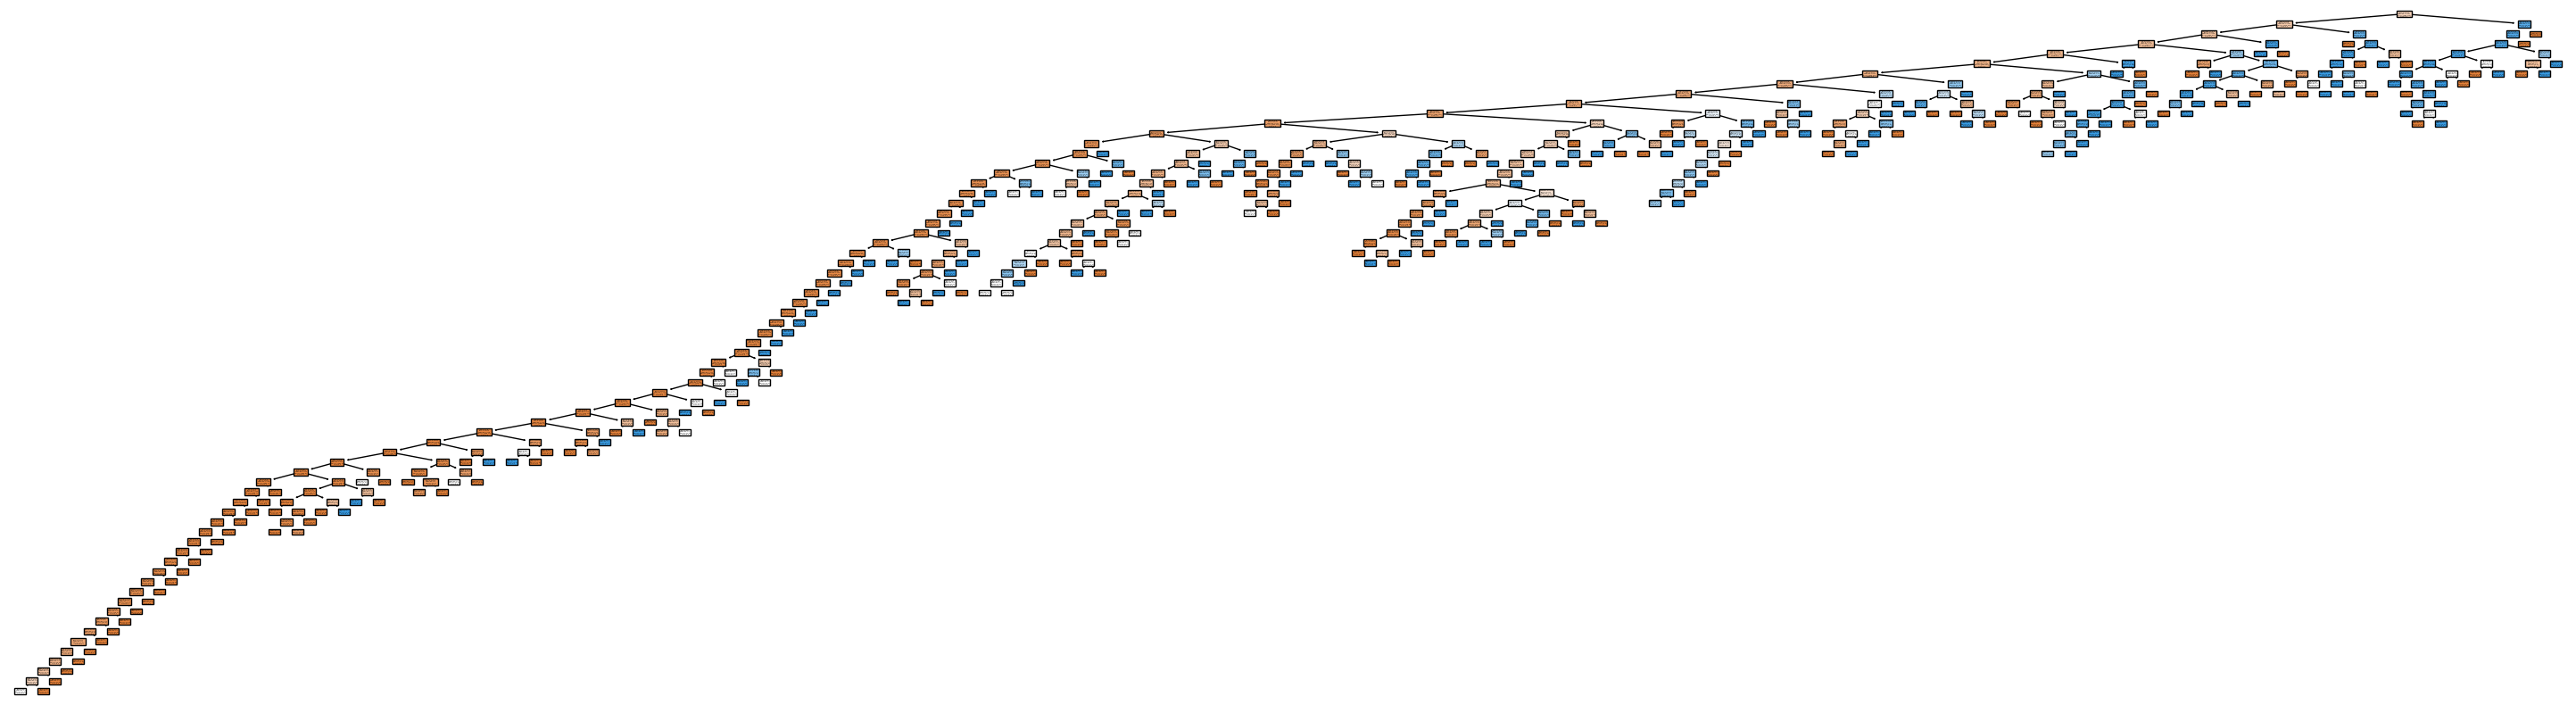

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer  # Import the vectorizer

training_data = pd.read_excel('training (2).xlsx')
testing_data = pd.read_excel('testing (2).xlsx')

training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

your_feature_names = ['input']

vectorizer = CountVectorizer()
Tr_X = vectorizer.fit_transform(training_data['input'])
Te_X = vectorizer.transform(testing_data['Equation'])

Tr_y = training_data['Classification']
Te_y = testing_data['Classification']

model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print("Training Set Accuracy:", training_accuracy)
print("Test Set Accuracy:", test_accuracy)

plt.figure(figsize=(37, 10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "1"])
plt.show()

Training Set Accuracy (with max_depth=5): 0.7577639751552795
Test Set Accuracy (with max_depth=5): 0.7


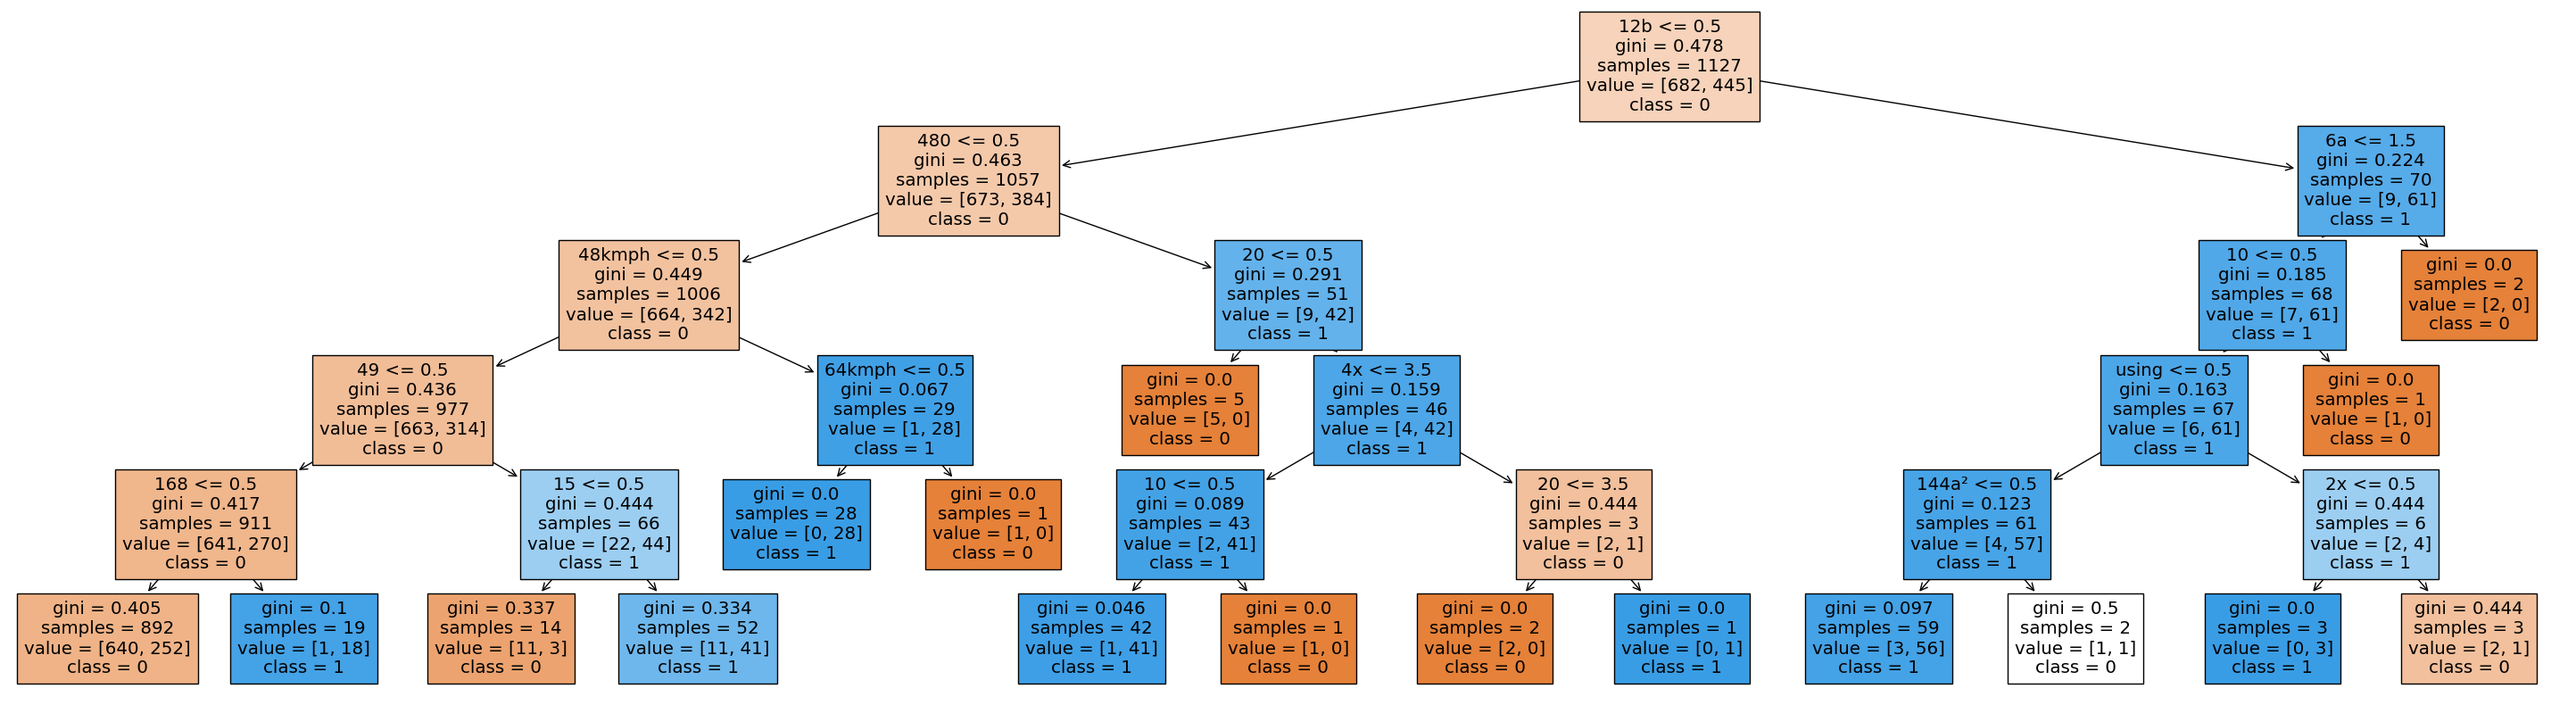

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Load the data
training_data = pd.read_excel('training (2).xlsx')
testing_data = pd.read_excel('testing (2).xlsx')

# Fill missing values
training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

# Create the vectorizer and transform your text data into numerical features
vectorizer = CountVectorizer()
Tr_X = vectorizer.fit_transform(training_data['input'])
Te_X = vectorizer.transform(testing_data['Equation'])

Tr_y = training_data['Classification']
Te_y = testing_data['Classification']

# Define your feature names based on the CountVectorizer vocabulary
your_feature_names = vectorizer.get_feature_names_out()

# Create and train the Decision Tree classifier with a max_depth constraint
model = DecisionTreeClassifier(max_depth=5)
model.fit(Tr_X, Tr_y)

# Evaluate accuracy on training and test data
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print("Training Set Accuracy (with max_depth=5):", training_accuracy)
print("Test Set Accuracy (with max_depth=5):", test_accuracy)

# Plot the Decision Tree
plt.figure(figsize=(37, 10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "1"])
plt.show()

Training Set Accuracy (with default criterion): 0.7577639751552795
Test Set Accuracy (with default criterion): 0.7


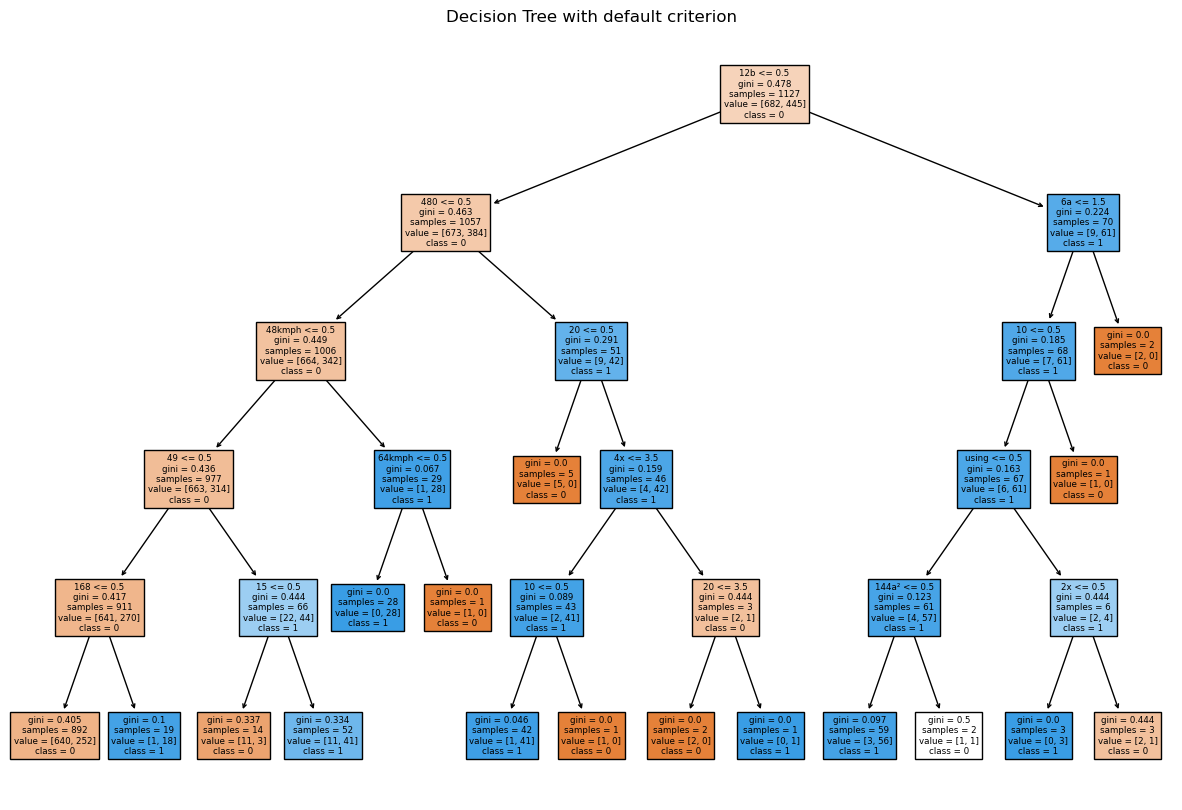


Training Set Accuracy (with 'entropy' criterion): 0.7542147293700089
Test Set Accuracy (with 'entropy' criterion): 0.6857142857142857


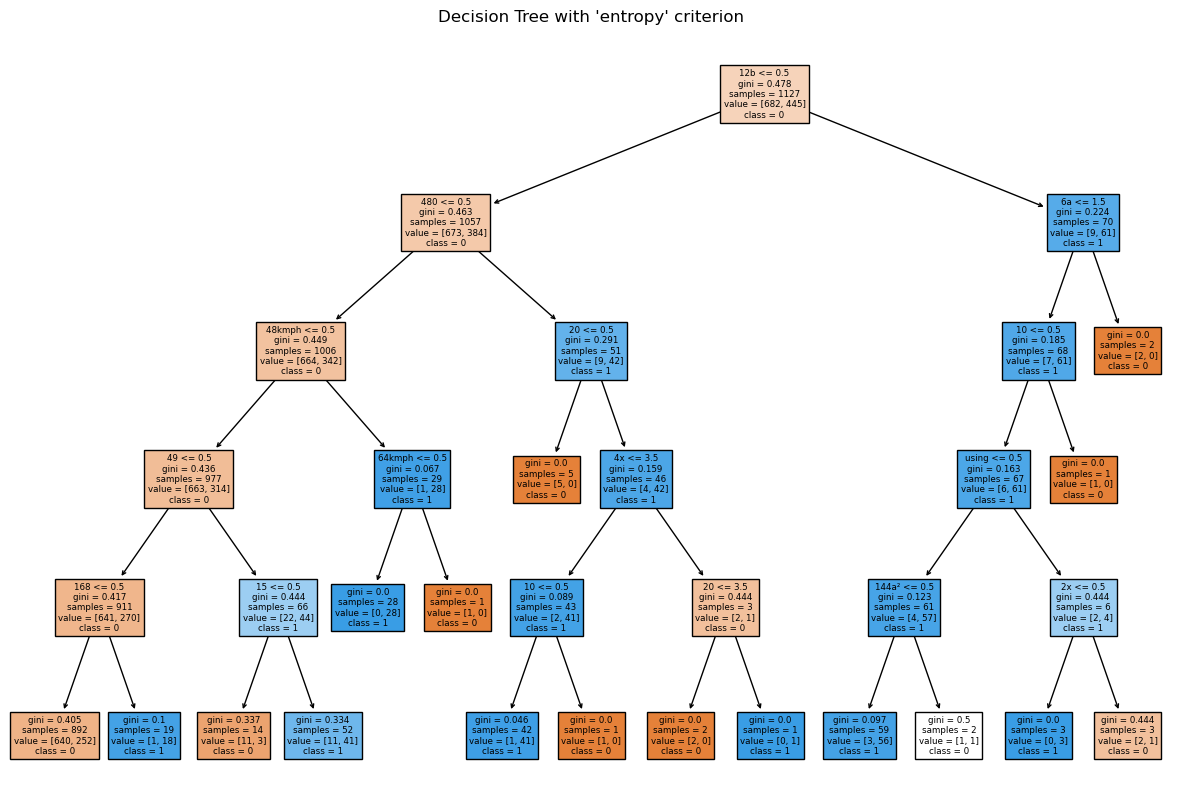

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

training_data = pd.read_excel('training (2).xlsx')
testing_data = pd.read_excel('testing (2).xlsx')

training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

vectorizer = CountVectorizer()
Tr_X = vectorizer.fit_transform(training_data['input'])
Te_X = vectorizer.transform(testing_data['Equation'])

Tr_y = training_data['Classification']
Te_y = testing_data['Classification']

your_feature_names = vectorizer.get_feature_names_out()

model_default = DecisionTreeClassifier(max_depth=5)  # No need to specify criterion, as it uses the default
model_default.fit(Tr_X, Tr_y)

training_accuracy_default = model_default.score(Tr_X, Tr_y)
test_accuracy_default = model_default.score(Te_X, Te_y)

print("Training Set Accuracy (with default criterion):", training_accuracy_default)
print("Test Set Accuracy (with default criterion):", test_accuracy_default)

plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "1"])
plt.title("Decision Tree with default criterion")
plt.show()

model_entropy = DecisionTreeClassifier(max_depth=5, criterion="entropy")
model_entropy.fit(Tr_X, Tr_y)

training_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)

print("\nTraining Set Accuracy (with 'entropy' criterion):", training_accuracy_entropy)
print("Test Set Accuracy (with 'entropy' criterion):", test_accuracy_entropy)

plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "1"])
plt.title("Decision Tree with 'entropy' criterion")
plt.show()

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

training_data = pd.read_excel('training (2).xlsx')
testing_data = pd.read_excel('testing (2).xlsx')

training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(training_data['input'])
X_test = vectorizer.transform(testing_data['Equation'])

y = training_data['Classification']
y_test = testing_data['Classification']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_val, y_pred_dt)
classification_report_dt = classification_report(y_val, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)

random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_val, y_pred_rf)
classification_report_rf = classification_report(y_val, y_pred_rf)

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Decision Tree Accuracy: 0.7300884955752213
Decision Tree Confusion Matrix:
 [[137   4]
 [ 57  28]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82       141
           1       0.88      0.33      0.48        85

    accuracy                           0.73       226
   macro avg       0.79      0.65      0.65       226
weighted avg       0.77      0.73      0.69       226


Random Forest Accuracy: 0.7345132743362832
Random Forest Confusion Matrix:
 [[137   4]
 [ 56  29]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82       141
           1       0.88      0.34      0.49        85

    accuracy                           0.73       226
   macro avg       0.79      0.66      0.66       226
weighted avg       0.77      0.73      0.70       226

